In [1]:
### ignore warning 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

import numpy as np
import pandas as pd
import re
import glob
import spacy 
import nltk
import os
import nltk
from nltk.tokenize import TreebankWordTokenizer ,word_tokenize
from nltk.stem import PorterStemmer , WordNetLemmatizer
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk import everygrams
from nltk.tokenize.treebank import TreebankWordDetokenizer
#from nltk.tokenize.treebank import TreebankWordDetokenizer
# TreebankWordDetokenizer().detokenize(['the', 'quick', 'brown'])
# nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk import everygrams

# display  max row 
#pd.set_option("display.max_rows", None)
import ast
import tensorflow as tf
## tqdm 
from tqdm._tqdm_notebook import tqdm_notebook,tqdm
tqdm_notebook.pandas()
import torch

[nltk_data] Downloading package punkt to /home/nick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/nick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import torch

print(torch.__version__)

1.12.0.dev20220329+cu113


In [3]:
!pip list

Package                      Version                 
---------------------------- ------------------------
absl-py                      1.0.0                   
aiohttp                      3.8.1                   
aiosignal                    1.2.0                   
alembic                      1.4.3                   
argon2-cffi                  21.3.0                  
argon2-cffi-bindings         21.2.0                  
astunparse                   1.6.3                   
async-timeout                4.0.2                   
attrs                        21.3.0                  
azure-core                   1.21.1                  
azure-storage-blob           12.5.0                  
backcall                     0.2.0                   
beautifulsoup4               4.10.0                  
bleach                       4.1.0                   
blis                         0.4.1                   
cachetools                   4.2.4                   
camelot-py                  

In [ ]:
#! pip install vaderSentiment

# Read Data 

In [4]:
trade_news_test_all =  pd.read_csv('./test_news_set_2.csv')

In [5]:
trade_news_test_all.shape

(300, 34)

In [6]:
trade_news_test_all['news_sentiment'].value_counts()

ไม่เกี่ยว    122
เชิงบวก       71
เชิงลบ        70
เป็นกลาง      35
เชืงลบ         1
กลาง           1
Name: news_sentiment, dtype: int64

In [7]:
trade_news_test = trade_news_test_all[ trade_news_test_all['news_sentiment'] != 'ไม่เกี่ยว'] 
trade_news_test.shape

(178, 34)

In [8]:
trade_news_test.columns

Index(['Unnamed: 0', 'No.', 'new_id', 'Y/N', 'Sentiment', 'Title', 'Content',
       'Publisher', 'Published_date', 'Source_url', 'Trade_AI_url',
       'ข่าวเกี่ยวหรือไม่เกี่ยว', 'ลักษณะของผลกระทบต่อไทย', 'Remark',
       'ข่าวเกี่ยวหรือไม่เกี่ยว.1', 'ลักษณะของผลกระทบต่อไทย.1', 'Remark.1',
       'ข่าวเกี่ยวหรือไม่เกี่ยว.2', 'ลักษณะของผลกระทบต่อไทย.2', 'Remark.2',
       'Check', 'Check.1', 'Result (Y/N)', 'Result (Sentiment)',
       'news_filtering_28042022', 'new_common_sentiment_28042022',
       'news_traded', 'news_sentiment', 'clean_content_prep_clean',
       'clean_content_ner_prep_clean', 'key_phase', 'sentence_clean',
       'sentence_score', 'sentence_phase'],
      dtype='object')

In [9]:
trade_news_test['news_sentiment'].replace('เชิงบวก',1,inplace=True)
trade_news_test['news_sentiment'].replace('เป็นกลาง',0,inplace=True)
trade_news_test['news_sentiment'].replace('เชิงลบ',-1,inplace=True)
trade_news_test['news_sentiment'].replace('กลาง',0,inplace=True)
trade_news_test['news_sentiment'].replace('เชืงลบ',-1,inplace=True)

/tmp/ipykernel_72588/3216744464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_news_test['news_sentiment'].replace('เชิงบวก',1,inplace=True)
/tmp/ipykernel_72588/3216744464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_news_test['news_sentiment'].replace('เป็นกลาง',0,inplace=True)
/tmp/ipykernel_72588/3216744464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_news_test['news_sentiment'].replace('เชิงลบ'

In [10]:
trade_news_test.head(20)

,Unnamed: 0,No.,new_id,Y/N,Sentiment,Title,Content,Publisher,Published_date,Source_url,...,news_filtering_28042022,new_common_sentiment_28042022,news_traded,news_sentiment,clean_content_prep_clean,clean_content_ner_prep_clean,key_phase,sentence_clean,sentence_score,sentence_phase
0,0,1,2ae6f44fb0d6d29036a13198b55eac3b,y,+,Enough agri waste in Asia to produce natural f...,Enough agri waste Asia produce natural fibres ...,Fibre2Fashion,2021-07-07 00:00:00.000,https://www.fibre2fashion.com/news/sustainabil...,...,0,99,1,1,Enough agri waste Asia produce natural fibres ...,enough agri waste produce natural fibres scale...,"[('residues', 0.5), ('year expected rise', 0.5)]",['enough agri waste produce natural fibres sca...,{'enough agri waste produce natural fibres sca...,{'enough agri waste produce natural fibres sca...
2,2,3,35411ef10c9c3dd84e4b21beaee10c6c,y,+,Indian startups raise $12 billion till June,Indian startups raise billion till June Mumbai...,The Times of India,2021-07-07 00:30:00.000,https://economictimes.indiatimes.com/tech/star...,...,0,99,1,0,Indian startups raise billion till June Indian...,startups raise billion till startups raise bil...,"[('deals compared', 0.09060342635210426), ('fu...","['startups raise billion till', 'startups rais...",{'startups raise billion till mumbai startups ...,{'startups raise billion till mumbai startups ...
3,3,4,d1d2823e495c1a630a75cb436bce9f1c,y,+,Analysis: China's farmers dump other crops for...,Analysis China farmers dump crops corn bumper ...,Reuters,2021-07-07 01:43:00.000,https://www.reuters.com/world/china/chinas-far...,...,0,99,1,-1,Analysis China farmers dump crops corn bumper ...,analysis farmers dump crops corn bumper profit...,"[('government estimates', 0.056745683790323145...",['analysis farmers dump crops corn bumper prof...,{'analysis farmers dump crops corn bumper prof...,{'analysis farmers dump crops corn bumper prof...
4,4,5,35f5a21087643fa4af6511b755b24e29,y,-,"Asia shares stumble, bonds and dollar find saf...",Asia shares stumble bonds dollar find safe dem...,Reuters,2021-07-07 02:33:31.000,https://www.reuters.com/article/us-global-mark...,...,เกี่ยว,เชิงลบ,1,-1,Asia shares stumble bonds dollar find safe dem...,shares stumble bonds dollar find safe demand u...,"[('lowest', 0.1161003051376975), ('lack agreem...",['shares stumble bonds dollar find safe demand...,{'shares stumble bonds dollar find safe demand...,{'shares stumble bonds dollar find safe demand...
5,5,6,71cae907684beb9be76051eda7c10b91,y,-,"Asia shares stumble, bonds and dollar find saf...",Asia shares stumble bonds dollar find safe dem...,The Times of India,2021-07-07 02:37:11.000,https://economictimes.indiatimes.com/markets/s...,...,เกี่ยว,เชิงลบ,1,-1,Asia shares stumble bonds dollar find safe dem...,shares stumble bonds dollar find safe demand s...,"[('lowest', 0.1284637059334314), ('lack agreem...",['shares stumble bonds dollar find safe demand...,{'shares stumble bonds dollar find safe demand...,{'shares stumble bonds dollar find safe demand...
6,6,7,79938ba274a00ef72c485f1e9add99c4,y,+,New Lotus Emira Sports Car Debut Signals a New...,New Lotus Emira Sports Car Debut Signals New C...,Newsweek,2021-07-07 03:12:46.000,https://www.newsweek.com/new-lotus-emira-sport...,...,0,99,1,1,New Lotus Emira Sports Car Debut Signals New C...,new lotus emira sports car debut signals new c...,"[('achieved date transformation business', 0.1...",['new lotus emira sports car debut signals new...,{'new lotus emira sports car debut signals new...,{'new lotus emira sports car debut signals new...
7,7,8,aa85f3fff47ecbbde0749da400b4194f,y,-,"PRECIOUS-Gold gains as bond yields slip, marke...",PRECIOUS Gold gains bond yields slip markets e...,Reuters,2021-07-07 03:25:00.000,https://www.reuters.com/article/global-preciou...,...,0,99,1,0,PRECIOUS Gold gains bond yields slip markets e...,precious gold gains bond yields slip markets e...,"[('ounce hitting highest', 0.2063942407892762)...",['precious gold gains bond yields slip

In [11]:
trade_news_test.drop(columns = ['Publisher', 'Published_date', 'Source_url', 'Trade_AI_url',
       'ข่าวเกี่ยวหรือไม่เกี่ยว', 'ลักษณะของผลกระทบต่อไทย', 'Remark',
       'ข่าวเกี่ยวหรือไม่เกี่ยว.1', 'ลักษณะของผลกระทบต่อไทย.1', 'Remark.1',
       'ข่าวเกี่ยวหรือไม่เกี่ยว.2', 'ลักษณะของผลกระทบต่อไทย.2', 'Remark.2',
       'Check', 'Check.1', 'news_filtering_28042022', 'No.', 'new_id', 'Y/N', 'Sentiment', 'Title',
     'Result (Y/N)', 'Result (Sentiment)', 'clean_content_prep_clean','key_phase',
       'sentence_clean', 'sentence_score', 'sentence_phase',
       'new_common_sentiment_28042022'],inplace=True, errors='ignore')

/tmp/ipykernel_72588/2387305787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_news_test.drop(columns = ['Publisher', 'Published_date', 'Source_url', 'Trade_AI_url',


In [12]:
trade_news_test.columns

Index(['Unnamed: 0', 'Content', 'news_traded', 'news_sentiment',
       'clean_content_ner_prep_clean'],
      dtype='object')

In [13]:
trade_news_test.head()

,Unnamed: 0,Content,news_traded,news_sentiment,clean_content_ner_prep_clean
0,0,Enough agri waste Asia produce natural fibres ...,1,1,enough agri waste produce natural fibres scale...
2,2,Indian startups raise billion till June Mumbai...,1,0,startups raise billion till startups raise bil...
3,3,Analysis China farmers dump crops corn bumper ...,1,-1,analysis farmers dump crops corn bumper profit...
4,4,Asia shares stumble bonds dollar find safe dem...,1,-1,shares stumble bonds dollar find safe demand u...
5,5,Asia shares stumble bonds dollar find safe dem...,1,-1,shares stumble bonds dollar find safe demand s...


## sentiment 

In [14]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

### Finance Bert 

In [15]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer
model_name = "ahmedrachid/FinancialBERT-Sentiment-Analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
try: 

    tokenizer_model_finance 

except :

    tokenizer_model_finance = BertTokenizer.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis")
    

try :
    model_finance
except :

    model_finance =  BertForSequenceClassification.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis",num_labels=3)  
    
def sentiment(content_clean,tokenizer_model=tokenizer_model_finance,model= model_finance) :
    """
    learning_rate = 2e-5
    batch_size = 32
    max_seq_length = 512
    num_train_epochs = 5

    """  

    
    nlp = pipeline("sentiment-analysis", model=model_finance, tokenizer=tokenizer_model_finance)
    results = nlp(content_clean,truncation=True,return_all_scores=True)
    #help(nlp)
    #print(results
    ##print(results)
    result_set = [(i['label'],i['score']) for i in results[0] ]  
    #print(result_set)
    ## positive ,neutral, negative
    return tuple([i[1] for i in sorted(result_set,key= lambda x: x[0],reverse=True)])
sentiment('enough agri waste produce natural fibres scale study enough agri waste produce natural fibres scale study enough usable agricultural residue streams farming east available producing natural fibre textiles scale according new study conducted based based commissioned study titled found large quantities agricultural residues countries the researchers looked crops find suitable fashion fibre production the study proposes roadmap collaboration innovation fashion food industries come together enable alternative feedstock help fashion industry build long term sustainable value chains global fibre production reached per year expected rise even residues potentially blended man made natural fibres produce innovative')    
    #return results[0]['label'] ,  results[0]['score']
#     return results['label'] ,  results['score']


/home/nick/envDITP/lib/python3.8/site-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


(0.5925474762916565, 0.4066410958766937, 0.0008114474476315081)

## FINBERT 

In [16]:
## FINBERT 

# tokenizer_FINBERT = AutoTokenizer.from_pretrained("ProsusAI/finbert")

# model_FIN_BERT = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

# nlp_FINBERT = pipeline("sentiment-analysis", model=model_FIN_BERT, tokenizer=tokenizer_FINBERT)
# #nlp2 = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
# resultsww = nlp_FINBERT(trade_news_test['clean_content_ner_prep_clean'][293],truncation=True,padding=True)


try: 

    tokenizer_FINBERT 

except :

    tokenizer_FINBERT = AutoTokenizer.from_pretrained("ProsusAI/finbert")
    

try :
    model_FIN_BERT
except :

    model_FIN_BERT =  AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")
    
def sentiment_FINBERT(content_clean,tokenizer_model=tokenizer_FINBERT,model= model_FIN_BERT) :
    """
    learning_rate = 2e-5
    batch_size = 32
    max_seq_length = 512
    num_train_epochs = 5

    """  

    
    nlp_FINBERT = pipeline("sentiment-analysis", model=model_FIN_BERT, tokenizer=tokenizer_FINBERT)
    results =  nlp_FINBERT(content_clean,truncation=True,padding=True,return_all_scores=True)
    result_set = [(i['label'],i['score']) for i in results[0] ]  
    ## positive ,neutral, negative
    return tuple([i[1] for i in sorted(result_set,key= lambda x: x[0],reverse=True)])
    #return results[0]['label'] ,  results[0]['score']
sentiment_FINBERT('enough agri waste produce natural fibres scale study enough agri waste produce natural fibres scale study enough usable agricultural residue streams farming east available produc')

(0.06802826374769211, 0.917228102684021, 0.01474357396364212)

## Roberta 

In [17]:
from transformers import pipeline
import json

from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer_2 = AutoTokenizer.from_pretrained("siebert/sentiment-roberta-large-english")

model_2 = AutoModelForSequenceClassification.from_pretrained("siebert/sentiment-roberta-large-english")
#sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
#nlp_roberta = pipeline("sentiment-analysis", model=model_2, tokenizer=tokenizer_2)
#print(nlp_roberta(trade_news['clean_content_ner_prep_clean'][4],truncation=True,padding=True))

try: 

    tokenizer_2  

except :

    tokenizer_2 = AutoTokenizer.from_pretrained("siebert/sentiment-roberta-large-english")
    

try :
    model_2
except :

    model_2 = AutoModelForSequenceClassification.from_pretrained("siebert/sentiment-roberta-large-english")    
    
def sentiment_roberta(content_clean,tokenizer_model=tokenizer_2,model= model_2) :
    """
    learning_rate = 2e-5
    batch_size = 32
    max_seq_length = 512
    num_train_epochs = 5

    """  

    
    nlp_roberta = pipeline("sentiment-analysis", model=model_2, tokenizer=tokenizer_2)
    #nlp2 = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
    results = nlp_roberta(content_clean,truncation=True,padding=True,return_all_scores=True)
    result_set = [(i['label'],i['score']) for i in results[0] ]  
    ## positive ,neutral, negative
    return tuple([i[1] for i in sorted(result_set,key= lambda x: x[0],reverse=True)])
sentiment_roberta('enough agri waste produce natural fibres scale study enough agri waste produce natural fibres scale study enough usable agricultural residue streams farming east available producing natural fibre textiles scale according new study conducted based based commissioned study titled found large quantities agricultural residues countries the researchers looked crops find suitable fashion fibre production the study proposes roadmap collaboration innovation fashion food industries come together enable alternative feedstock help fashion industry build long term sustainable value chains global fibre production reached per year expected rise even residues potentially blended man made natural fibres produce innovative')

(0.9986622333526611, 0.0013377750292420387)

## Roberta 3 class 

In [18]:

# tokenizer_r3 = AutoTokenizer.from_pretrained("j-hartmann/sentiment-roberta-large-english-3-classes")

# model_r3 = AutoModelForSequenceClassification.from_pretrained("j-hartmann/sentiment-roberta-large-english-3-classes")

try: 

    tokenizer_r3  

except :

    tokenizer_r3 =  AutoTokenizer.from_pretrained("j-hartmann/sentiment-roberta-large-english-3-classes")
    

try :
    model_r3
except :

    model_r3 = AutoModelForSequenceClassification.from_pretrained("j-hartmann/sentiment-roberta-large-english-3-classes") 
    
def sentiment_roberta3(content_clean,tokenizer_model=tokenizer_r3,model= model_r3) :
    """
    learning_rate = 2e-5
    batch_size = 32
    max_seq_length = 512
    num_train_epochs = 5

    """  
    
    nlp_roberta3 = pipeline("sentiment-analysis", model=model_r3, tokenizer=tokenizer_r3)
    #nlp2 = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
    results = nlp_roberta3(content_clean,truncation=True,padding=True,return_all_scores=True)
   
    ## positive ,neutral, negative
    return [i['score'] for i in sorted(results[0],key= lambda x: x['label'],reverse=True)]
sentiment_roberta3('enough agri waste produce natural fibres scale study enough agri waste produce natural fibres scale study enough usable agricultural residue streams farming east available producing natural fibre textiles scale according new study conducted based based commissioned study titled found large quantities agricultural residues countries the researchers looked crops find suitable fashion fibre production the study proposes roadmap collaboration innovation fashion food industries come together enable alternative feedstock help fashion industry build long term sustainable value chains global fibre production reached per year expected rise even residues potentially blended man made natural fibres produce innovative')   
    #return results[0]['label'] ,  results[0]['score']

Some weights of the model checkpoint at j-hartmann/sentiment-roberta-large-english-3-classes were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[0.0007066993857733905, 0.9988634586334229, 0.00042987402412109077]

In [19]:
# ee = [{'label': 'negative', 'score': 0.00042987402412109077}, {'label': 'neutral', 'score': 0.9988634586334229}, {'label': 'positive', 'score': 0.0007066993857733905}]
# import numpy as np 
# import pandas as pd

# ee['score']
# # ddd = pd.DataFrame.from_records(ee)
# # ddd['score']
# # import json 
# # json.read(ee)

In [20]:
trade_news_test.columns

Index(['Unnamed: 0', 'Content', 'news_traded', 'news_sentiment',
       'clean_content_ner_prep_clean'],
      dtype='object')

## Final sentiment

In [21]:
def final(data) : 
    if data['sentiment_common_finance'] == 0 :
        if data['sentiment_common_roberta'] == 'POSITIVE'  and data['score_roberta'] >= 0.9967  :  #0.99
            return 1
        elif data['sentiment_common_roberta'] == 'POSITIVE'  and data['score_roberta']< 0.9967 : 
            return 0
        
        elif data['sentiment_common_roberta'] == 'NEGATIVE'  and data['score_roberta'] > 0.982:
            return -1
        elif data['sentiment_common_roberta'] == 'NEGATIVE'  and data['score_roberta'] <=0.982:
            return 0
    else : 
            return  data['sentiment_common_finance']
        
        
## Do not consider with previous method finance BERT          
from sklearn.metrics import confusion_matrix

def final_score(data) : 
        if data['sentiment_common_roberta'] == 'POSITIVE'  and data['score_roberta'] >= 0.9965 :  #0.9962
            return 1
        elif data['sentiment_common_roberta'] == 'POSITIVE'  and data['score_roberta']< 0.9965 : 
            return 0
        
        elif data['sentiment_common_roberta'] == 'NEGATIVE'  and data['score_roberta'] > 0.982:
            return -1
        elif data['sentiment_common_roberta'] == 'NEGATIVE'  and data['score_roberta'] <=0.982:
            return 0
        
# def final_(data) : 
#     if data['sentiment_common_finance'] == 0 :
#         if data['sentiment_common_roberta'] == 'POSITIVE'  and data['score_roberta'] >= 0.9962  :  #0.99
#             return 1
#         elif data['sentiment_common_roberta'] == 'POSITIVE'  and data['score_roberta']< 0.9962  : 
#             return 0
        
#         elif data['sentiment_common_roberta'] == 'NEGATIVE'  and data['score_roberta'] > 0.982:
#             return -1
#         elif data['sentiment_common_roberta'] == 'NEGATIVE'  and data['score_roberta'] <=0.982:
#             return 0
#     else : 
#             return  data['sentiment_common_finance']
                

## Veder 

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_vader(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
#     help(sid_obj)
#     print(sentiment_dict)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] >= 0.05 :#0.05
        overall_sentiment = "Positive"

    elif sentiment_dict['compound'] <= - 0.05 :
        overall_sentiment = "Negative"

    else :
        overall_sentiment = "Neutral"
    
    return positive, neutral,negative, compound
    #return compound, overall_sentiment
sentiment_vader('enough agri waste produce natural fibres scale study enough agri waste produce natural fibres scale study enough usable agricultural residue streams farming east available producing natural fibre textiles scale according new study conducted based based commissioned study titled found large quantities agricultural residues countries the researchers looked crops find suitable fashion fibre production the study proposes roadmap collaboration innovation fashion food industries come together enable alternative feedstock help fashion industry build long term sustainable value chains global fibre production reached per year expected rise even residues potentially blended man made natural fibres produce innovative') 

(0.199, 0.75, 0.051, 0.9246)

In [23]:
## Created Table 



In [24]:
sentiment_vader(trade_news_test['clean_content_ner_prep_clean'][0])

(0.209, 0.739, 0.052, 0.9876)

In [25]:
trade_news_test.shape

(178, 5)

In [26]:
sentiment_vader(trade_news_test['clean_content_ner_prep_clean'][3])

(0.146, 0.797, 0.057, 0.9917)

In [27]:
trade_news_test['clean_content_ner_prep_clean']

0      enough agri waste produce natural fibres scale...
2      startups raise billion till startups raise bil...
3      analysis farmers dump crops corn bumper profit...
4      shares stumble bonds dollar find safe demand u...
5      shares stumble bonds dollar find safe demand s...
                             ...                        
290    ginger prices drop due plentiful supply the av...
292    senators urge reverse harmful decision affecti...
293    mango pomegranate exports start jan feb federa...
295    slight drop mango numbers still plenty fruit s...
296    petition alleges lemon juice dumping seeks dut...
Name: clean_content_ner_prep_clean, Length: 178, dtype: object

## Evaluation

In [28]:


def classification_report( actual , predict ):
    from sklearn.metrics import classification_report
    target_names = ['negative', 'neutral', 'positive']
    print(classification_report(actual, predict ,target_names =target_names ))
    target_names = ['negative', 'neutral', 'positive']
    dict_ouput = classification_report(actual, predict,target_names =target_names ,output_dict=True)
    
    return dict_ouput 

def classification_report_2class( actual , predict ):
    from sklearn.metrics import classification_report
    target_names = ['negative',  'positive']
    print(classification_report(actual, predict ,target_names =target_names ))
    target_names = ['negative', 'positive']
    dict_ouput = classification_report(actual, predict,target_names =target_names ,output_dict=True)
    
    return dict_ouput 
    
    


In [29]:
## CM matrix 
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score

def confusion_matrix_show2(y_actual,y_predict) :
    #print(name)
        # evaluated with baseline performance 
    cm = confusion_matrix(y_actual, y_predict)
    
    accuracy = accuracy_score(y_actual, y_predict)
    print('Accuracy Score :',accuracy)
    cm_df = pd.DataFrame(cm,
                         index = ['Negative','Neutral','Positive'], 
                         columns = ['Negative','Neutral','Positive'])
    cm_df        

    import seaborn as sns
    import matplotlib.pyplot as plt
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True, cmap="YlGnBu")
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
# y_actual = trade_news_test['news_sentiment']
# y_predict = trade_news_test['sentiment_common_finance']
# cm = confusion_matrix(y_actual, y_predict )

### 2 class confusion matrix plot 

In [30]:
from sklearn.metrics import plot_confusion_matrix

def confusion_2class(y_actual,y_predict) :
    tn, fp, fn, tp  = confusion_matrix(y_actual, y_predict).ravel()
    print('True-negative:',tn , ' False-positive:',fp, '\nFalse-negative:',fn, ' True-positive: ',tp)  ##  fp predict  use to not -use 
    cm = confusion_matrix(y_actual, y_predict)
    cm
    #plt.imshow(cm, cmap='binary')
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap = 'YlGn');  #YlGn
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Negative', 'Positive'])
    ax.yaxis.set_ticklabels(['Negative', 'Positive'])

In [31]:
trade_news_test.columns

Index(['Unnamed: 0', 'Content', 'news_traded', 'news_sentiment',
       'clean_content_ner_prep_clean'],
      dtype='object')

In [32]:
# created data set 
finan_bert1 = trade_news_test[['clean_content_ner_prep_clean','news_sentiment']].copy()
finan_bert2 = trade_news_test[['clean_content_ner_prep_clean','news_sentiment']].copy()
roberta_bert2 = trade_news_test[['clean_content_ner_prep_clean','news_sentiment']].copy()
roberta_bert3 = trade_news_test[['clean_content_ner_prep_clean','news_sentiment']].copy()
vader_df = trade_news_test[['clean_content_ner_prep_clean','news_sentiment']].copy()

#positive ,neutral, negative

# created x feature



In [33]:
finan_bert1['positive'],finan_bert1['neutral'],finan_bert1['negative']  =  zip(*finan_bert1['clean_content_ner_prep_clean'].progress_apply(sentiment))

  0%|          | 0/178 [00:00<?, ?it/s]

In [34]:
finan_bert2['positive'],finan_bert2['neutral'],finan_bert2['negative']  = zip(*finan_bert2['clean_content_ner_prep_clean'].progress_apply(sentiment))

  0%|          | 0/178 [00:00<?, ?it/s]

In [35]:
roberta_bert2['positive'],roberta_bert2['negative']  = \
zip(*roberta_bert2['clean_content_ner_prep_clean'].progress_apply(sentiment_roberta))

  0%|          | 0/178 [00:00<?, ?it/s]

In [36]:
roberta_bert3['positive'],roberta_bert3['neutral'],roberta_bert3['negative']  =\
zip(*roberta_bert3['clean_content_ner_prep_clean'].progress_apply(sentiment_roberta3))

  0%|          | 0/178 [00:00<?, ?it/s]

In [37]:
vader_df['positive'],vader_df['neutral'],vader_df['negative'],vader_df['compound'] = \
zip(*vader_df['clean_content_ner_prep_clean'].progress_apply(sentiment_vader))

  0%|          | 0/178 [00:00<?, ?it/s]

## Modeling 

## Finance Bert

In [ ]:
trade_news_test['sentiment_common_finance'], trade_news_test['prob_score_finance'] = \
zip(*trade_news_test['clean_content_ner_prep_clean'].progress_apply(sentiment)) 


# finance BERT 

trade_news_test['sentiment_common_finance'].replace('neutral',0,inplace=True)
trade_news_test['sentiment_common_finance'].replace('negative',-1,inplace=True)
trade_news_test['sentiment_common_finance'].replace('positive',1,inplace=True)
from sklearn.metrics import classification_report

print('Finance Bert')
#classification_report( trade_news_test.news_sentiment , trade_news_test['sentiment_common_finance'])
target_names = ['negative', 'neutral', 'positive']
print(classification_report(trade_news_test['news_sentiment'], trade_news_test['sentiment_common_finance'], target_names=target_names))

In [ ]:
confusion_matrix_show2(trade_news_test['news_sentiment'],trade_news_test['sentiment_common_finance'])

In [ ]:

print('FINANCE BERT Result')
#classification_report( trade_news_test.news_sentiment , trade_news_test['sentiment_common_finance'])
target_names = ['negative', 'neutral', 'positive']

xx= classification_report(trade_news_test['news_sentiment'], trade_news_test['sentiment_common_finance'], target_names=target_names,output_dict=True)

## sentiment_FINBERT

In [ ]:
trade_news_test['sentiment_FIN_BERT'], trade_news_test['prob_score_finbert'] = \
zip(*trade_news_test['clean_content_ner_prep_clean'].progress_apply(sentiment_FINBERT)) 

In [ ]:
trade_news_test.value_counts()

In [ ]:
trade_news_test['sentiment_FIN_BERT'].replace('neutral',0, inplace=True)
trade_news_test['sentiment_FIN_BERT'].replace('negative',-1, inplace=True)
trade_news_test['sentiment_FIN_BERT'].replace('positive',1, inplace=True)

result_FIN_BERT = classification_report( trade_news_test['news_sentiment'],  trade_news_test['sentiment_FIN_BERT'])


In [ ]:
confusion_matrix_show2(trade_news_test['news_sentiment'],trade_news_test['sentiment_FIN_BERT'])

### ROBERTA

In [ ]:
trade_news_test['sentiment_common_roberta'], trade_news_test['score_roberta'] =\
zip(*trade_news_test['clean_content_ner_prep_clean'].progress_apply( sentiment_roberta))



In [ ]:

trade_news_test['roberta_tunning'] = trade_news_test.apply(lambda x : final_score(x) , axis = 1)

print('ROBERTA Result')
#target_names = ['negative', 'neutral', 'positive']
#print(classification_report(trade_news_test['news_sentiment'], trade_news_test['roberta_tunning'] , target_names=target_names))


result_roberta = classification_report( trade_news_test['news_sentiment'],  trade_news_test['roberta_tunning'])

In [ ]:
confusion_matrix_show2(trade_news_test['news_sentiment'],trade_news_test['roberta_tunning'])

## ROBERTA 3 Class 

In [ ]:
trade_news_test['sentiment_common_roberta3'], trade_news_test['score_roberta3'] =\
zip(*trade_news_test['clean_content_ner_prep_clean'].progress_apply( sentiment_roberta3))

In [ ]:
trade_news_test['sentiment_common_roberta3'].value_counts()

trade_news_test['sentiment_common_roberta3'].replace('neutral',0,inplace=True)
trade_news_test['sentiment_common_roberta3'].replace('negative',-1,inplace=True)
trade_news_test['sentiment_common_roberta3'].replace('positive',1,inplace=True)


result_roberta3 = classification_report( trade_news_test['news_sentiment'],  trade_news_test['sentiment_common_roberta3'])

In [ ]:
confusion_matrix_show2(trade_news_test['news_sentiment'],trade_news_test['sentiment_common_roberta3'])

### Vader 

In [ ]:
trade_news_test['score_common_veder'], trade_news_test['sentiment_common_veder'] =\
zip(*trade_news_test['clean_content_ner_prep_clean'].progress_apply( sentiment_vader))

trade_news_test['sentiment_common_veder'].replace('Positive',1,inplace=True)
trade_news_test['sentiment_common_veder'].replace('Negative',-1,inplace=True)
trade_news_test['sentiment_common_veder'].replace('Neutral',0,inplace=True)

print("VABER Result")


#target_names = ['negative', 'neutral', 'positive']
#print(classification_report(trade_news_test['news_sentiment'], trade_news_test['score_common_veder'], target_names=target_names))
result_vader = classification_report( trade_news_test['news_sentiment'],  trade_news_test['sentiment_common_veder'] )

In [ ]:
confusion_matrix_show2(trade_news_test['news_sentiment'],trade_news_test['sentiment_common_veder'])

In [ ]:
dd =pd.DataFrame(result_vader)
dd

## Vader and Roberta 

In [ ]:
## Vader and ROberta 
#trade_news_test
trade_news_test['vader_roberta'] = trade_news_test.progress_apply(\
                                                                   lambda x : x['roberta_tunning']  if x['sentiment_common_veder'] != 1    else x['sentiment_common_veder'] ,axis= 1 )  





In [ ]:
trade_news_test['vader_roberta'].value_counts()

In [ ]:
print('Vader and Roberta')
print(classification_report( trade_news_test['news_sentiment'],  trade_news_test['vader_roberta'] ))

In [ ]:
print('Vader_Roberta')
confusion_matrix_show2(trade_news_test['news_sentiment'],trade_news_test['vader_roberta'])

In [ ]:
## FIN_BERT AND ROBERTA 

def roberta_finance(data):
    if data['roberta_tunning'] == 0 :
        return data['sentiment_common_finance'] 
    else :
        return data['roberta_tunning'] 
trade_news_test['roberta_finance']  = trade_news_test.apply(lambda x :roberta_finance(x), axis=1 )

In [ ]:
print('roberta_finance')
x= classification_report( trade_news_test['news_sentiment'], trade_news_test['roberta_finance'] )


In [ ]:
print('roberta_finance')
confusion_matrix_show2(trade_news_test['news_sentiment'],trade_news_test['roberta_finance'] )

In [ ]:
## Finance Bert and Roberta 
# final
        
trade_news_test['fibert_roberta'] = trade_news_test.apply(lambda x:final(x),axis=1 )
print('Finance Bert and Roberta ')
x= classification_report( trade_news_test['news_sentiment'], trade_news_test['fibert_roberta'] )




In [ ]:
print('Finance Bert & Roberta')
confusion_matrix_show2(trade_news_test['news_sentiment'],trade_news_test['fibert_roberta'] )

## Predict 2 Class merge with  positive and Neatral class 

In [ ]:
def merge_2(data):
    if data == 1 or data==0 :
        return 2
    else :
        return -2 

trade_news_test['news_sentiment_2class'] = trade_news_test['news_sentiment'].apply(merge_2)
trade_news_test['roberta_tunning_2class'] =  trade_news_test['roberta_tunning'].apply(merge_2)

In [ ]:
print('Roberta 2 Class merge with  positive and neutral ')
x= classification_report_2class( trade_news_test['news_sentiment_2class'],trade_news_test['roberta_tunning_2class'])


In [ ]:
confusion_2class(trade_news_test['news_sentiment_2class'],trade_news_test['roberta_tunning_2class'])

In [ ]:
trade_news_test.columns

In [ ]:
trade_news_test[['news_sentiment','roberta_tunning','sentiment_common_finance','prob_score_finance']].head(40)

In [ ]:
trade_news_test.columns

In [38]:
# from sklearn.metrics import classification_report
# y_true = [0, 1, 2, 2, 2]
# y_pred = [0, 0, 2, 2, 1]
# target_names = ['class 0', 'class 1', 'class 2']
# print(classification_report(y_true, y_pred, target_names=target_names))
# confusion_matrix_show2(y_true,y_pred)
x_all = vader_df.drop(columns=['clean_content_ner_prep_clean','news_sentiment'])
y_all=  vader_df['news_sentiment']


x_all_rb3 = roberta_bert3.drop(columns=['clean_content_ner_prep_clean','news_sentiment'])
y_all_rb3=  roberta_bert3['news_sentiment']


In [39]:
# data Train test split 
from sklearn.model_selection import train_test_split
# data train test split 
def split_data(x,y,n): # test_size
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=float(n), random_state=123)
    return X_train, X_test, y_train, y_test 
X_train, X_test, y_train, y_test = split_data(x_all,y_all,0.2)

In [40]:
X_train1, X_test1, y_train1, y_test1 = split_data(x_all_rb3,y_all_rb3,0.2)

In [41]:
X_train.index == X_train1.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [42]:
list_sentiment = ['F_bert','Fin_bert','Roberta2','Roberta3','Vader']
finan_bert1,finan_bert2,roberta_bert2,roberta_bert3,vader_df
def sentiment(sen_model ) : 
    if sen_model == 'F_bert':
        return finan_bert1
#         display(df.head())
#         x_all = df.drop(columns=['clean_content_ner_prep_clean','news_sentiment'])
#         y_all=  df['news_sentiment']
    elif sen_model == 'Fin_bert':
        return finan_bert2
    elif sen_model == 'Roberta2':
        return roberta_bert2 
    elif sen_model == 'Roberta3':
        return roberta_bert3
    elif sen_model == 'Vader':
        return vader_df 

In [43]:
!pip install xgboost

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [44]:
## Created ML to classification 

## created model  function
 # Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier, BaggingRegressor, GradientBoostingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier , LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


def fn_model(model,x_train,y_train,x_test,y_test) :
    if model == 'Svm' :
        clf = SVC(kernel='linear',probability=True)
        train_d = clf.fit(x_train, y_train)
        
        ## Predict traning set 
        y_pred_train =  train_d.predict(x_train)
        y_probs_train = train_d.predict_proba(x_train)
        
        #Predict the response for test dataset
        y_pred = train_d.predict(x_test)
        y_probs = train_d.predict_proba(x_test)
        return y_pred,y_probs,y_pred_train,y_probs_train
    elif model  ==  'Logistic' :
        logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
        train_d = logreg.fit(x_train, y_train)
        
        ## Predict traning set 
        y_pred_train =  train_d.predict(x_train)
        y_probs_train = train_d.predict_proba(x_train)
        
        y_pred = train_d.predict(x_test)
        y_probs = train_d.predict_proba(x_test)
        return y_pred,y_probs,y_pred_train,y_probs_train
    elif model == 'XGBoost' :
        xgb_model =  xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc" )
        xgb_m = xgb_model.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)] )

        ## Predict traning set 
        y_pred_train =  xgb_m.predict(x_train)
        y_probs_train = xgb_m.predict_proba(x_train)
        
        y_pred =  xgb_m.predict(x_test)
        y_probs = xgb_m.predict_proba(x_test)
        return y_pred,y_probs,y_pred_train,y_probs_train        
    elif model ==  'Nb' :
        nb =  GaussianNB()
        nb.fit(x_train, y_train)
        
        ## Predict traning set 
        y_pred_train =  nb.predict(x_train)
        y_probs_train = nb.predict_proba(x_train)

        y_pred=nb.predict(x_test) 
        y_probs =  nb.predict_proba(x_test)
        return y_pred,y_probs,y_pred_train,y_probs_train
    
    elif model == 'sgd' :
        sgd =  SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
        sgd.fit(x_train, y_train)
        
        ## Predict traning set 
        y_pred_train =  sgd.predict(x_train)
        y_probs_train = sgd.predict_proba(x_train)
        
        y_pred=sgd.predict(x_test)
        y_probs  =  sgd.predict_proba(x_test)
        return y_pred,y_probs,y_pred_train,y_probs_train
    
    elif model  ==  'Random_f' :
        Rdf =RandomForestClassifier(n_estimators=100)

        #Train the model using the training sets y_pred=clf.predict(X_test)
        Rdf.fit(x_train,y_train)

         ## Predict traning set 
        y_pred_train =  Rdf.predict(x_train)
        y_probs_train = Rdf.predict_proba(x_train)
        
        y_pred = Rdf.predict(x_test)        
        y_probs  =  Rdf.predict_proba(x_test)
        return y_pred,y_probs,y_pred_train,y_probs_train
        
    elif model ==  'Knn' :
        Knn =  KNeighborsClassifier(n_neighbors=1)
        Knn.fit(x_train,y_train)
        
        ## Predict traning set 
        y_pred_train =  Knn.predict(x_train)
        y_probs_train = Knn.predict_proba(x_train)
        
        # prediction

        y_pred = Knn.predict(x_test)
        y_probs = Knn.predict_proba(x_test)
        return y_pred,y_probs,y_pred_train,y_probs_train,Knn
    elif model   ==  'Decision_t' :
        Dt = DecisionTreeClassifier(max_depth=10, random_state=101, max_features = None)
        Dt.fit(x_train,y_train)
        
        ## Predict traning set 
        y_pred_train =  Dt.predict(x_train)
        y_probs_train = Dt.predict_proba(x_train)
        
        #prediction 
        y_pred = Dt.predict(x_test)
        y_probs  =  Dt.predict_proba(x_test)
        return y_pred,y_probs,y_pred_train,y_probs_train
    elif model ==  'Mlp_relu' :
        mlp_relu = MLPClassifier(random_state=1, max_iter=300,activation='relu')  
        mlp_relu.fit(X_train, y_train)
        
        ## Predict traning set 
        y_pred_train =  mlp_relu.predict(x_train)
        y_probs_train = mlp_relu.predict_proba(x_train)
        
        #prediction 
        y_pred = mlp_relu.predict(x_test)
        y_probs  =  mlp_relu.predict_proba(x_test)
        return y_pred,y_probs,y_pred_train,y_probs_train
    elif model ==  'Mlp_tanch' :
        mlp_tanh = MLPClassifier(random_state=1, max_iter=300,activation='tanh')   #tanh
        mlp_tanh.fit(X_train, y_train)
        
        ## Predict traning set 
        y_pred_train =  mlp_tanh.predict(x_train)
        y_probs_train = mlp_tanh.predict_proba(x_train)
        
        #prediction 
        y_pred = mlp_tanh.predict(x_test)
        y_probs  =  mlp_tanh.predict_proba(x_test)
        print(y_probs)
        return y_pred,y_probs,y_pred_train,y_probs_train
        
        
     
#     elif model  == 'deep' :
        
#         ### created model  ###
#         model = Sequential()  
#         model.add(Dense(256, kernel_initializer='uniform',activation='relu',input_dim= x_train.shape[1]))
#         #model.add(Dense(256,activation='relu'))
#         model.add(Dense(128, kernel_initializer='uniform',activation='relu'))
#         model.add(Dense(64, kernel_initializer='uniform',activation='relu'))
#         model.add(Dropout(0.2))
#         model.add(Dense(1, kernel_initializer='uniform',activation='sigmoid'))
#         ### add complie###
        
#         model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
         
#         model_fit = model.fit(x = x_train ,y = y_train,epochs = 200,batch_size=512) #,validation_data=(x_test ,y_test)
#         sc = StandardScaler()
#         x_test = sc.fit_transform(x_test)
#         y_pred = model.predict(x_test)
#         #y_probs  =  model.predict_proba(x_test)
        
#         return y_pred , y_probs 

# accuracy = accuracy_score(y_actual, y_predict)

In [45]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
model = ['Svm','Logistic','XGBoost','Nb','sgd','Random_f','Knn','Decision_t','Mlp_relu']
list_sentiment = ['F_bert','Fin_bert','Roberta2','Roberta3','Vader']
df_result = pd.DataFrame(columns = (
    ['Model_N','Pre_sentiment','accuracy_test','auc_ovr_test','auc_ovo_test','accuracy_train','auc_ovr_train','auc_ovo_train'])                     
                        )
counter = 0 
for i in range(len(model)) :
    for j in range(len(list_sentiment)) :
        df_result.loc[counter,'Model_N'] = model[i] 
        df_result.loc[counter,'Pre_sentiment'] = list_sentiment[j] 
        counter += 1          
for i,j in df_result.iterrows():
#    # print(j)
#     try:
        print(f"{j['Model_N']}-{j['Pre_sentiment']}")
        
        df = sentiment(j['Pre_sentiment'])
        x_all = df.drop(columns=['clean_content_ner_prep_clean','news_sentiment'])
        y_all =  df['news_sentiment']
        
        ## split data specify  random stat value 123
        
        X_train, X_test, y_train, y_test = split_data(x_all.values,y_all.values,0.2)
        
        le = LabelEncoder()
        y_train = le.fit_transform(y_train)
        y_test = le.transform(y_test)
        print(le.inverse_transform([0,1,2]))
        predict = fn_model(j['Model_N'],X_train,y_train,X_test,y_test) 
        #print(predict[1])
        
        # Auc test set  
        auc = metrics.roc_auc_score(y_test, predict[1],multi_class='ovr', average = 'macro')  
        auc2 = metrics.roc_auc_score(y_test, predict[1],multi_class='ovo', average = 'macro') 
        
        
        ## Auc test _set 
        auc_train = metrics.roc_auc_score(y_train, predict[3],multi_class='ovr', average = 'macro')  
        auc2_train = metrics.roc_auc_score(y_train, predict[3],multi_class='ovo', average = 'macro') 
#         auc = accuracy_score(y_test, predict[1][:,1])
#         tn, fp, fn, tp  = confusion_matrix(y_test, predict[0]).ravel()

        accurac_traning = accuracy_score(y_train, predict[2])
        accuracy = accuracy_score(y_test, predict[0])
        
        
        df_result.loc[i,'accuracy_test'] = accuracy
        df_result.loc[i,'auc_ovr_test'] = auc
        df_result.loc[i,'auc_ovo_test'] = auc2
        
        df_result.loc[i,'accuracy_train'] = accurac_traning
        df_result.loc[i,'auc_ovr_train'] = auc_train
        df_result.loc[i,'auc_ovo_train'] = auc2_train
        
#         df_result.loc[i, 'tp'] = tp 
#         df_result.loc[i, 'tn'] = tn
#         df_result.loc[i, 'fn'] = fn
#         df_result.loc[i, 'fp'] = fp
        print('---Done---')
#     except :
#         print('--Fail--')
df_result

Svm-F_bert
[-1  0  1]
---Done---
Svm-Fin_bert
[-1  0  1]
---Done---
Svm-Roberta2
[-1  0  1]
---Done---
Svm-Roberta3
[-1  0  1]
---Done---
Svm-Vader
[-1  0  1]
---Done---
Logistic-F_bert
[-1  0  1]
---Done---
Logistic-Fin_bert
[-1  0  1]
---Done---
Logistic-Roberta2
[-1  0  1]
---Done---
Logistic-Roberta3
[-1  0  1]
---Done---
Logistic-Vader
[-1  0  1]
---Done---
XGBoost-F_bert
[-1  0  1]
[0]	validation_0-auc:0.48680
[1]	validation_0-auc:0.44801
[2]	validation_0-auc:0.46163
[3]	validation_0-auc:0.43658
[4]	validation_0-auc:0.47981
---Done---
XGBoost-Fin_bert
[-1  0  1]
[0]	validation_0-auc:0.48680
[1]	validation_0-auc:0.44801
[2]	validation_0-auc:0.46163
[3]	validation_0-auc:0.43658
[4]	validation_0-auc:0.47981
[5]	validation_0-auc:0.47689
---Done---
XGBoost-Roberta2
[-1  0  1]
[0]	validation_0-auc:0.41787
[1]	validation_0-auc:0.43122
[2]	validation_0-auc:0.42875
[3]	validation_0-auc:0.42725
[4]	validation_0-auc:0.43042
[5]	validation_0-auc:0.43743
[6]	validation_0-auc:0.43804
[7]	valid

/home/nick/envDITP/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/nick/envDITP/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/nick/envDITP/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/nick/envDITP/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_

---Done---
XGBoost-Vader
[-1  0  1]
[0]	validation_0-auc:0.59621
[1]	validation_0-auc:0.60001
[2]	validation_0-auc:0.58181
[3]	validation_0-auc:0.59572
[4]	validation_0-auc:0.59674
[5]	validation_0-auc:0.59433
[6]	validation_0-auc:0.60622
[7]	validation_0-auc:0.59428
[8]	validation_0-auc:0.60270
[9]	validation_0-auc:0.59318
[10]	validation_0-auc:0.59308
[11]	validation_0-auc:0.59465
---Done---
Nb-F_bert
[-1  0  1]
---Done---
Nb-Fin_bert
[-1  0  1]
---Done---
Nb-Roberta2
[-1  0  1]
---Done---
Nb-Roberta3
[-1  0  1]
---Done---
Nb-Vader
[-1  0  1]
---Done---
sgd-F_bert
[-1  0  1]
---Done---
sgd-Fin_bert
[-1  0  1]
---Done---
sgd-Roberta2
[-1  0  1]


/home/nick/envDITP/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


---Done---
sgd-Roberta3
[-1  0  1]
---Done---
sgd-Vader
[-1  0  1]
---Done---
Random_f-F_bert
[-1  0  1]
---Done---
Random_f-Fin_bert
[-1  0  1]
---Done---
Random_f-Roberta2
[-1  0  1]
---Done---
Random_f-Roberta3
[-1  0  1]
---Done---
Random_f-Vader
[-1  0  1]
---Done---
Knn-F_bert
[-1  0  1]
---Done---
Knn-Fin_bert
[-1  0  1]
---Done---
Knn-Roberta2
[-1  0  1]
---Done---
Knn-Roberta3
[-1  0  1]
---Done---
Knn-Vader
[-1  0  1]
---Done---
Decision_t-F_bert
[-1  0  1]
---Done---
Decision_t-Fin_bert
[-1  0  1]
---Done---
Decision_t-Roberta2
[-1  0  1]
---Done---
Decision_t-Roberta3
[-1  0  1]
---Done---
Decision_t-Vader
[-1  0  1]
---Done---
Mlp_relu-F_bert
[-1  0  1]
---Done---
Mlp_relu-Fin_bert
[-1  0  1]
---Done---
Mlp_relu-Roberta2
[-1  0  1]
---Done---
Mlp_relu-Roberta3
[-1  0  1]
---Done---
Mlp_relu-Vader
[-1  0  1]
---Done---


,Model_N,Pre_sentiment,accuracy_test,auc_ovr_test,auc_ovo_test,accuracy_train,auc_ovr_train,auc_ovo_train
0,Svm,F_bert,0.305556,0.391924,0.387838,0.457746,0.556312,0.556829
1,Svm,Fin_bert,0.305556,0.388686,0.381769,0.457746,0.525898,0.531869
2,Svm,Roberta2,0.333333,0.477721,0.481559,0.521127,0.626498,0.618383
3,Svm,Roberta3,0.333333,0.493599,0.502568,0.422535,0.419129,0.425884
4,Svm,Vader,0.277778,0.451665,0.450747,0.492958,0.600161,0.589872
5,Logistic,F_bert,0.361111,0.440803,0.448529,0.429577,0.57709,0.570118
6,Logistic,Fin_bert,0.361111,0.440803,0.448529,0.429577,0.57709,0.570118
7,Logistic,Roberta2,0.333333,0.464585,0.471522,0.521127,0.606154,0.598946
8,Logistic,Roberta3,0.305556,0.417165,0.403245,0.415493,0.522817,0.519839
9,Logistic,Vader,0.277778,0.438609,0.437208,0.5,0.620332,0.610332


In [46]:
df_result.columns =['Model_N', 'Pre_sentiment', 'accuracy_score', 'auc_ovr_score',
       'auc_ovo_score', 'accuracy_train', 'auc_ovr_train', 'auc_ovo_train']

In [47]:
df_result.columns

Index(['Model_N', 'Pre_sentiment', 'accuracy_score', 'auc_ovr_score',
       'auc_ovo_score', 'accuracy_train', 'auc_ovr_train', 'auc_ovo_train'],
      dtype='object')

In [48]:
def display_metrics(df_result_dl):
    return df_result_dl.style.bar(subset=['auc_ovr_score'], color='lightskyblue')\
                    .bar(subset=["auc_ovo_score"], color='lightgreen')\
                    .bar(subset=["accuracy_score"], color='orange')\
                    .format({'auc_ovr_score':'{:.2%}','auc_ovo_score':'{:.3}','accuracy_score':'{:.3}'})
df_filter_got_result =df_result[["Model_N","Pre_sentiment","auc_ovr_score",'auc_ovo_score']]
display_metrics(df_filter_got_result)

KeyError: "None of [Index(['accuracy_score'], dtype='object')] are in the [columns]"

In [49]:
df_filter_got_result =df_result[["Model_N","Pre_sentiment","auc_ovr_score",'auc_ovo_score']]
def display_metrics(df_result):
    return df_result.style.bar(subset=['auc_ovr_score'], color='lightskyblue')\
                    .bar(subset=["auc_ovo_score"], color='lightgreen')\
                    .format({'auc_ovr_score':'{:.3}','auc_ovo_score':'{:.3}'})
df_filter_got_result =df_result[["Model_N","Pre_sentiment","auc_ovr_score",'auc_ovo_score']]
display_metrics(df_filter_got_result)

,Model_N,Pre_sentiment,auc_ovr_score,auc_ovo_score
0,Svm,F_bert,0.392,0.388
1,Svm,Fin_bert,0.389,0.382
2,Svm,Roberta2,0.478,0.482
3,Svm,Roberta3,0.494,0.503
4,Svm,Vader,0.452,0.451
5,Logistic,F_bert,0.441,0.449
6,Logistic,Fin_bert,0.441,0.449
7,Logistic,Roberta2,0.465,0.472
8,Logistic,Roberta3,0.417,0.403
9,Logistic,Vader,0.439,0.437


In [ ]:
df_filter_got_result.to_csv('./model_sentiment_performance.csv')

## selected model

In [ ]:
## XGboost vader

vade_sentiment = sentiment('Vader' )
x_all = vade_sentiment.drop(columns=['clean_content_ner_prep_clean','news_sentiment'])
y_all =  vade_sentiment['news_sentiment']

## split data specify  random stat value 123

X_train, X_test, y_train, y_test = split_data(x_all.values,y_all.values,0.2)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
print(le.inverse_transform([0,1,2]))
predict = fn_model('XGBoost',X_train,y_train,X_test,y_test) 

In [ ]:
print('Vader and Roberta')
print(classification_report( y_test,  predict[0] ))
confusion_matrix_show2(y_test,predict[0])

In [ ]:
auc = metrics.roc_auc_score(y_test, predict[1],multi_class='ovr', average = 'macro') 
auc

In [ ]:
# from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc
# # y_score_train = logreg_model_under.decision_function(X_oversampled)
# fpr_train, tpr_train, _ = roc_curve(y_test,  predict[1])
# auc_train = roc_auc_score(y_test,  predict[1])
# plt.plot(fpr_train,tpr_train, color='red', label='oversampled - train , auc='+str(auc_train))

# # y_score_test = logreg_model_under.decision_function(X_test)
# # fpr_test, tpr_test, _ = roc_curve(y_test,  y_score_test)
# # auc_test = roc_auc_score(y_test, y_score_test)
# # plt.plot(fpr_test,tpr_test, color='Blue', label='oversampled - test , auc='+str(auc_test))

# # plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# # plt.legend(loc=4)
# plt.show()

[-1  0  1]
KNN Roberta3
              precision    recall  f1-score   support

    negative       0.57      0.47      0.52        17
     neutral       0.50      0.29      0.36         7
    positive       0.44      0.67      0.53        12

    accuracy                           0.50        36
   macro avg       0.51      0.47      0.47        36
weighted avg       0.52      0.50      0.49        36

{'negative': {'precision': 0.5714285714285714, 'recall': 0.47058823529411764, 'f1-score': 0.5161290322580646, 'support': 17}, 'neutral': {'precision': 0.5, 'recall': 0.2857142857142857, 'f1-score': 0.36363636363636365, 'support': 7}, 'positive': {'precision': 0.4444444444444444, 'recall': 0.6666666666666666, 'f1-score': 0.5333333333333333, 'support': 12}, 'accuracy': 0.5, 'macro avg': {'precision': 0.5052910052910052, 'recall': 0.4743230625583566, 'f1-score': 0.47103290974258716, 'support': 36}, 'weighted avg': {'precision': 0.5152116402116402, 'recall': 0.5, 'f1-score': 0.492212447051156

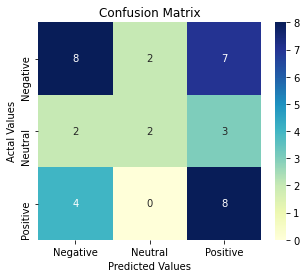

,positive,neutral,negative
249,0.000656,0.998367,0.000977
82,0.000910,0.998683,0.000407
246,0.001135,0.634848,0.364017
122,0.000984,0.323858,0.675158
144,0.000729,0.998546,0.000725
273,0.000654,0.998865,0.000481
56,0.000475,0.040634,0.958891
245,0.005187,0.994522,0.000290
282,0.000296,0.991715,0.007988
149,0.000480,0.998857,0.000663


In [50]:
## KNN ROberta3 


## XGboost vader

Roberta3_sentiment = sentiment('Roberta3' )
x_all = Roberta3_sentiment.drop(columns=['clean_content_ner_prep_clean','news_sentiment'])
y_all =  Roberta3_sentiment['news_sentiment']

## split data specify  random stat value 123

X_train, X_test, y_train, y_test = split_data(x_all,y_all,0.2)

# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_test = le.transform(y_test)
print(le.inverse_transform([0,1,2]))
predict = fn_model('Knn',X_train,y_train,X_test,y_test) 


print('KNN Roberta3')
print(classification_report( y_test,  predict[0] ))
confusion_matrix_show2(y_test,predict[0])

X_test

In [51]:
list_index = X_test.index
xw= predict[-1].predict(X_test)

In [52]:
predict[-1]

KNeighborsClassifier(n_neighbors=1)

In [53]:
import joblib
 
# Save the model as a pickle in a file
#joblib.dump(knn, 'filename.pkl')
def save_model(model, path) :  

 
    # Save the trained model as a pickle string.
    save_model = joblib.dump(model,path) # 'filename.pkl'
    return save_model

In [54]:
save_model(predict[-1],f'./knn_reberta3_50_2.pkl')

['./knn_reberta3_50_2.pkl']

In [57]:
import joblib

# try :
model_sentiment_file =  model_from_joblib = joblib.load('./knn_reberta3_50_2.pkl')
#     print('Load Done !!!')
# except :
#     print('Check Model_Path')

In [ ]:
x_all

In [ ]:
x_all['pred_sentiment']=model_sentiment_file.predict(x_all)


In [ ]:
#x_all.drop(columns='pred_sentiment',inplace=True)
x_all

In [ ]:
x_all

In [ ]:
final = trade_news_test.merge(x_all,left_index=True,right_index=True)

In [ ]:
final = final[['Content', 'news_traded',
       'clean_content_ner_prep_clean', 'news_sentiment',
       'pred_sentiment']] 
replace_value = {1:'positive',-1:'negative',0:'neutral'}
replace_trade = {1:'trade'}
final['pred_sentiment'].replace(replace_value,inplace=True)
final['news_sentiment'].replace(replace_value,inplace=True)
final['news_traded'].replace(replace_trade,inplace=True)
final.to_excel('./sentiment_result.xlsx')

In [ ]:
# trade_news_test.drop(columns= ['pred_sentiment'],inplace=True)
trade_news_test_knn_rebeta3 = trade_news_test[trade_news_test.index.isin(list_index)]

In [ ]:
trade_news_test.shape

In [ ]:
trade_news_test_knn_rebeta3.merge(X_test,left_index=True,right_index=True,how='inner' )

In [ ]:
trade_news_test_knn_rebeta3.to_excel('./sentiment_result_file.xlsx')

In [ ]:
predict[-1]

In [ ]:
df = sentiment('Roberta3')
x_all = df.drop(columns=['clean_content_ner_prep_clean','news_sentiment'])
y_all =  df['news_sentiment']
y_pred_train =  predict[-1].predict(x_all)
y_probs_train = predict[-1].predict_proba(x_all)

In [ ]:
trade_news_test['pred_sentiment'] = y_pred_train

In [ ]:
trade_news_test